In [1]:
import import_ipynb
import i_creation_environnement
import numpy as np
import matplotlib.pyplot as plt

importing Jupyter notebook from i_creation_environnement.ipynb


In [2]:
env = i_creation_environnement.AugmentedGridworldEnv()

# Value Iteration

In [3]:
def value_iteration(env, theta=0.0001, discount_factor=1.0):
    """
    Value Iteration Algorithm.
    
    Args:
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
        
    Returns:
        A tuple (policy, V) of the optimal policy and the optimal value function.
    """
    
    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
    
    V = np.zeros(env.nS)
    for i in range(10000):
        # Stopping condition
        delta = 0
        # Update each state...
        for s in range(env.nS):
            # Do a one-step lookahead to find the best action
            A = one_step_lookahead(s, V)
            best_action_value = np.max(A)
            # Calculate delta across all states seen so far
            delta = max(delta, np.abs(best_action_value - V[s]))
            # Update the value function. Ref: Sutton book eq. 4.10. 
            V[s] = best_action_value        
        # Check if we can stop 
        if delta < theta:
            print("")
            print(" --------- >       VALUE FUNCTION STABLE")
            break
            
        if i%30==0:
            print("Step :", i, "     Delta : ", delta)
            plt.imshow(V.reshape(env.shape))
            plt.show()
    
    # Create a deterministic policy using the optimal value function
    policy = np.zeros([env.nS, env.nA])
    for s in range(env.nS):
        # One step lookahead to find the best action for this state
        A = one_step_lookahead(s, V)
        best_action = np.argmax(A)
        # Always take the best action
        policy[s, best_action] = 1.0
    
    return policy, V

Step : 0      Delta :  99.5


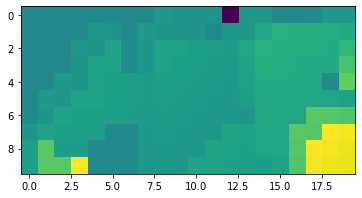

Step : 30      Delta :  36.98501866941433


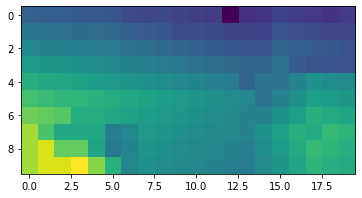

Step : 60      Delta :  27.357832119538216


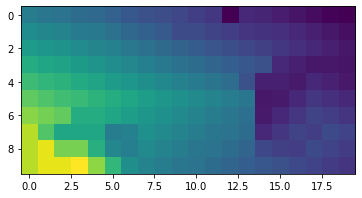

Step : 90      Delta :  20.236598633916856


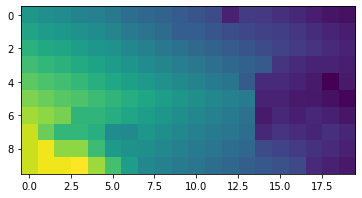

Step : 120      Delta :  14.96901956561669


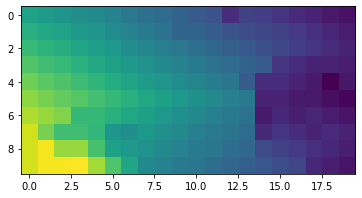

Step : 150      Delta :  11.072589361943756


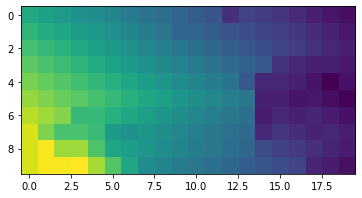

Step : 180      Delta :  8.190398485404785


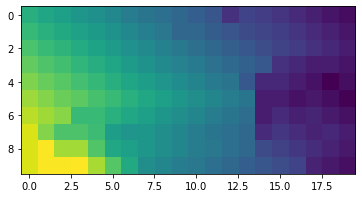

Step : 210      Delta :  6.058440817853352


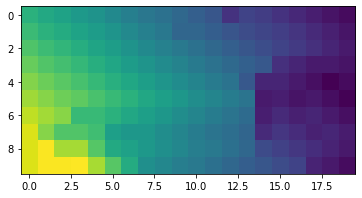

Step : 240      Delta :  4.481430935117714


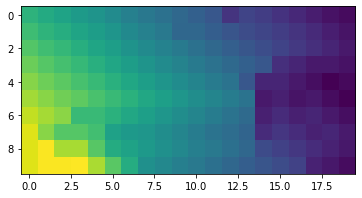

Step : 270      Delta :  3.3149161360206563


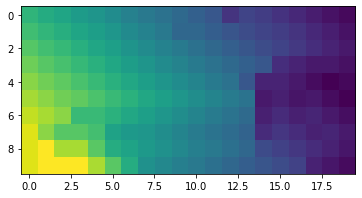

Step : 300      Delta :  2.4520447035656616


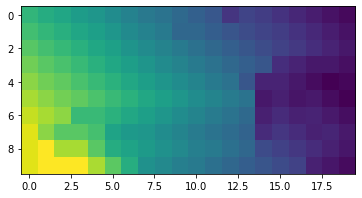

Step : 330      Delta :  1.8137783827924068


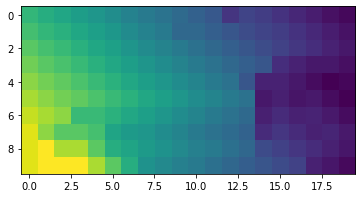

Step : 360      Delta :  1.3416525469947373


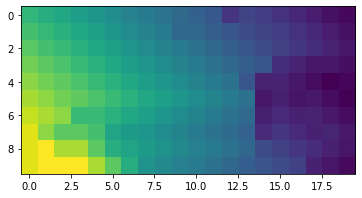

Step : 390      Delta :  0.9924208899701625


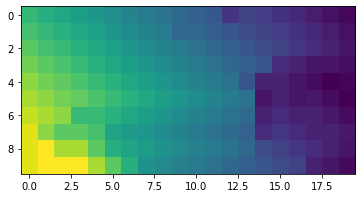

Step : 420      Delta :  0.7340941028696761


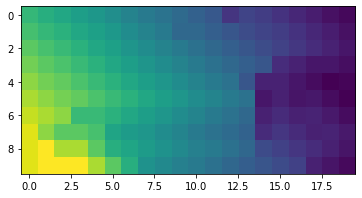

Step : 450      Delta :  0.5430096819945902


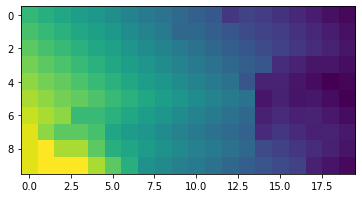

Step : 480      Delta :  0.4016644645253109


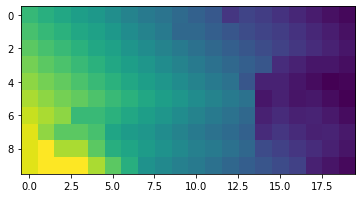

Step : 510      Delta :  0.29711135438628844


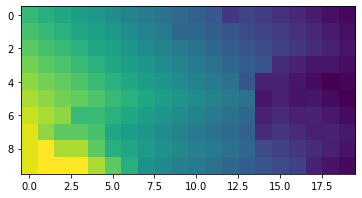

Step : 540      Delta :  0.21977337977750722


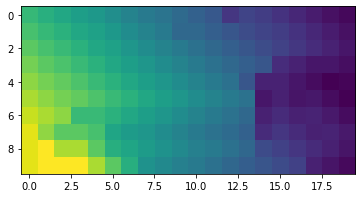

Step : 570      Delta :  0.16256645108296652


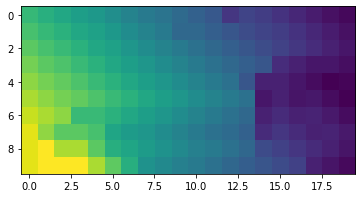

Step : 600      Delta :  0.12025046456619748


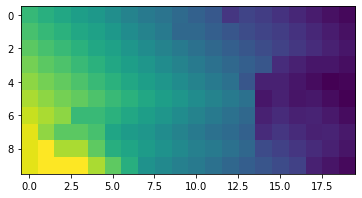

Step : 630      Delta :  0.08894931354006985


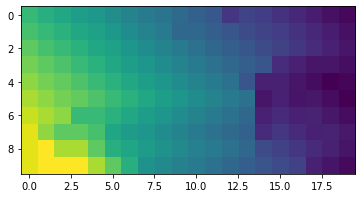

Step : 660      Delta :  0.06579584043811337


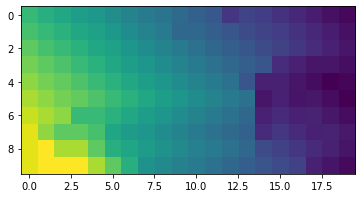

Step : 690      Delta :  0.048669207740204


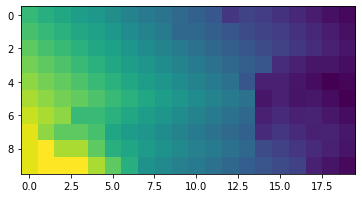

Step : 720      Delta :  0.036000631138449535


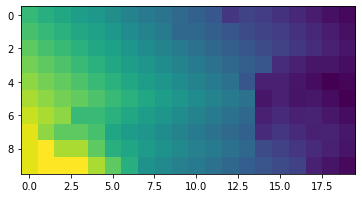

Step : 750      Delta :  0.026629680295627622


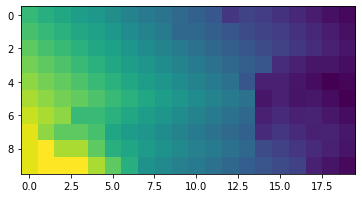

Step : 780      Delta :  0.019697984456797712


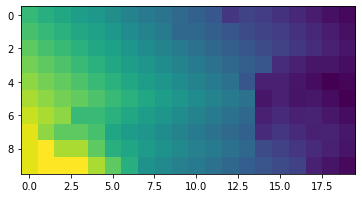

Step : 810      Delta :  0.014570606458619295


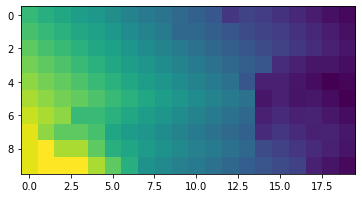

Step : 840      Delta :  0.01077788303791749


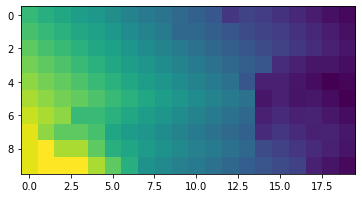

Step : 870      Delta :  0.007972404107931652


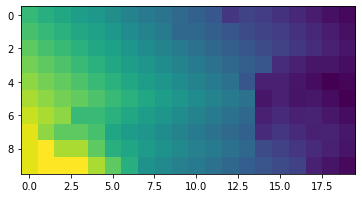

Step : 900      Delta :  0.005897190296309418


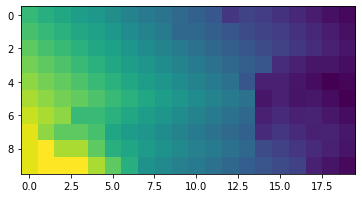

Step : 930      Delta :  0.004362153864349239


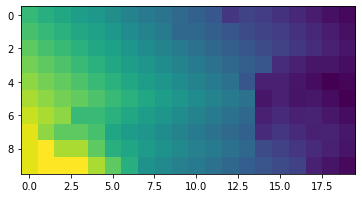

Step : 960      Delta :  0.003226686842026538


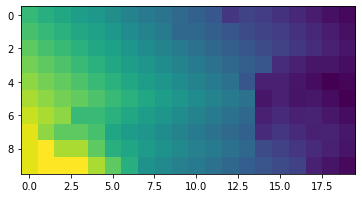

Step : 990      Delta :  0.0023867814634286333


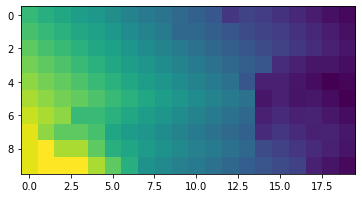

Step : 1020      Delta :  0.0017655031388130737


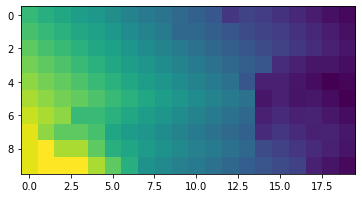

Step : 1050      Delta :  0.001305943331317394


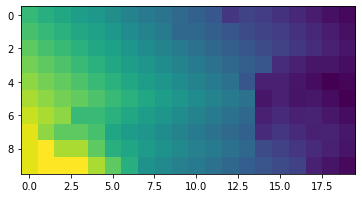

Step : 1080      Delta :  0.0009660067698860075


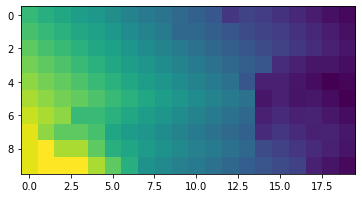

Step : 1110      Delta :  0.0007145555682654958


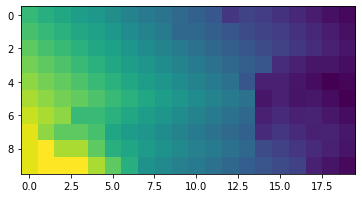

Step : 1140      Delta :  0.0005285570223350078


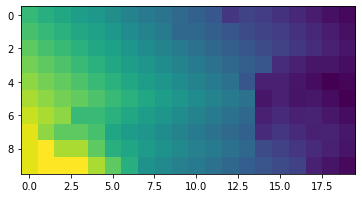

Step : 1170      Delta :  0.00039097382614272647


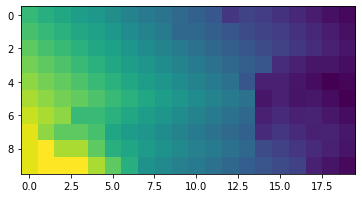

Step : 1200      Delta :  0.0002892034854085068


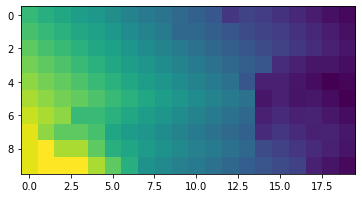

Step : 1230      Delta :  0.00021392392682173522


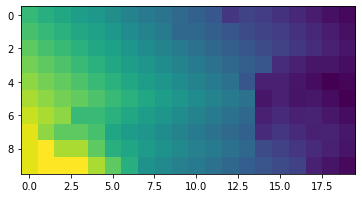

Step : 1260      Delta :  0.0001582396089361282


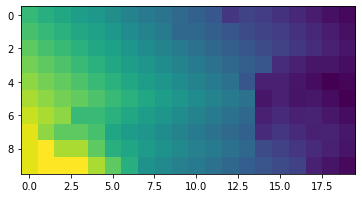

Step : 1290      Delta :  0.00011704989810823463


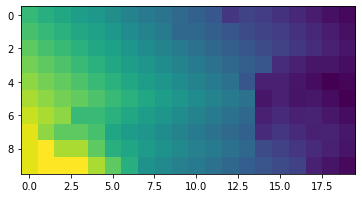


 --------- >       VALUE FUNCTION STABLE


In [4]:
policy_1, v_1 = value_iteration(env, discount_factor = 0.99)

### Final results for Value Iteration

Value Function:


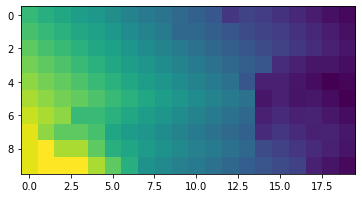


Reshaped Grid Policy :

↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←←←←
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↑↑↑↓↓↑
↓↓↓←←←←←←←←←←←↑↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑




In [16]:
print("Value Function:")
plt.imshow(v_1.reshape(env.shape))
plt.show()
print("")

print("Reshaped Grid Policy :")
print("")
env.render_policy(np.reshape(np.argmax(policy_1, axis=1), env.shape))
print("")

# Policy Evaluation

In [17]:
def policy_eval(policy, env, discount_factor=0.999, theta=0.000001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    
    # Start with a random (all 0) value function

    V = np.zeros(env.nS)
    while True:
        delta = 0
        # For each state, perform a "full backup"
        for s in range(env.nS):  # for all the states
            v = 0
            # Look at the possible next actions
            for a, action_prob in enumerate(policy[s]):
                
                # For each action, look at the possible next states...
                for  prob, next_state, reward, done in env.P[s][a]:
                    
                    # Calculate the expected value. Ref: Sutton book eq. 4.6.
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
                    
            # How much our value function changed (across any states)
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
            
        # Stop evaluating once our value function change is below a threshold
        #print(delta)
        if delta < theta:
            break
    return np.array(V), delta

In [18]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v, delta = policy_eval(random_policy, env, 1)

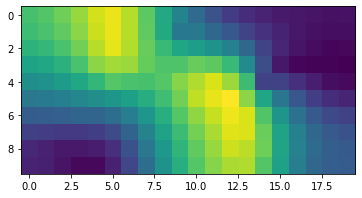

In [19]:
plt.imshow(vv)

# Policy Iteration

In [21]:
def policy_improvement(env, policy_eval_fn=policy_eval, discount_factor=1):
    """
    Policy Improvement Algorithm. Iteratively evaluates and improves a policy
    until an optimal policy is found.
    
    Args:
        env: The OpenAI environment.
        policy_eval_fn: Policy Evaluation function that takes 3 arguments:
            policy, env, discount_factor.
        discount_factor: gamma discount factor.
        
    Returns:
        A tuple (policy, V). 
        policy is the optimal policy, a matrix of shape [S, A] where each state s
        contains a valid probability distribution over actions.
        V is the value function for the optimal policy.
        
    """
    
    

    def one_step_lookahead(state, V):
        """
        Helper function to calculate the value for all action in a given state.
        
        Args:
            state: The state to consider (int)
            V: The value to use as an estimator, Vector of length env.nS
        
        Returns:
            A vector of length env.nA containing the expected value of each action.
        """
        A = np.zeros(env.nA)
        for a in range(env.nA):
            for prob, next_state, reward, done in env.P[state][a]:
                A[a] += prob * (reward + discount_factor * V[next_state])
        return A
    
    # Start with a random policy
    policy = np.ones([env.nS, env.nA]) / env.nA
    ancient_V = np.zeros(env.nS)

    #while True:
    for i in range(30):
        
        # Evaluate the current policy
        V, delta = policy_eval_fn(policy, env, discount_factor)
        print("###############################    STEP  : ", i, "   ##############################")
        # Will be set to false if we make any changes to the policy
        policy_stable = True
        
        # For each state...
        for s in range(env.nS):
            # The best action we would take under the current policy
            chosen_a = np.argmax(policy[s])
            
            # Find the best action by one-step lookahead
            # Ties are resolved arbitarily
            action_values = one_step_lookahead(s, V)
            best_a = np.argmax(action_values)
            
            # Greedily update the policy
            if chosen_a != best_a:
                policy_stable = False
            policy[s] = np.eye(env.nA)[best_a]
        
        # If the policy is stable we've found an optimal policy. Return it
        if policy_stable :
            print("")
            print("----------> STABLE POLICY")
            return policy, V
        
        print("")
        print("CURRENT POLICY")
        env.render_policy(np.reshape(np.argmax(policy, axis=1), env.shape))
        print("")
        
        print("DIFFERENCES WITH PREVIOUS VALUE FUNCTION")
        plt.imshow(np.reshape(V - ancient_V, env.shape))
        plt.show()
        print("")
        
        print("CURRENT VALUE FUNCTION")
        plt.imshow(np.reshape(V, env.shape))
        plt.colorbar()
        plt.show()
        print("")
        print("")
        
    
        ancient_V = V
        
        #rint(np.reshape(np.argmax(policy, axis=1), env.shape))
        #rint(V.reshape(env.shape))
        
    return policy, V

###############################    STEP  :  0    ##############################

CURRENT POLICY
→→→→→↑←←←←←←↓↓↓→→→→↑
↑→→→→↑←←←↓↓↓↓↓↓↓→→↑↑
↑↑→→→↑←←←↓↓↓↓↓↓←←↑↑↑
↑↑↑→→↑←←←↓↓↓↓↓←↓↑↑↑↑
↑↑↑↑↑↑↑↑→→→→←↓↓↓↓↓↓↓
↑↑↑↑↑↑↑↑→→↑↑↑↓←←←↓↓↓
↑↑↑↑↑↑↑→→→→→→↑←←←↓↓↓
↑↑↑↑↑↑→→→→→→→↑←←←←←←
↑↑↑↑↑→→→→→→→→↑←←←↑←←
↓←←←→→→→→→→→↑↑←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


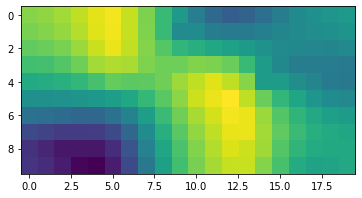


CURRENT VALUE FUNCTION


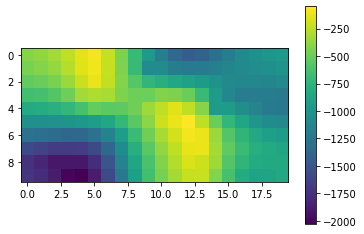



###############################    STEP  :  1    ##############################

CURRENT POLICY
→→→→→↑←←↓↓←←→↓→→→→→↓
→→↓↓↓↑←→←↓↓↓→→←→→→→↓
→→→→←←←←↑→↓↓↓↑↑←→→→↓
→→↑↑↑↑←←→→↓↓↓↓←→↑→→→
→→↓←↑↑↑↑→→→→←↓↓↓↑↑↑↑
→→↓←↑↑↑↑↑↑↑↑↑↓←←→↓↓↓
→→↑↑↑↑↑↓↓↓↓↓→↑←←→↓↓↓
→↑↑↑↑↓→→→→→←←↑←←→↑←←
↑↑↑↑→→→→→→↑↑→↑←↑→↑↑↑
↑↑↑←←↑↑↑↑↑↑↑↑↑←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


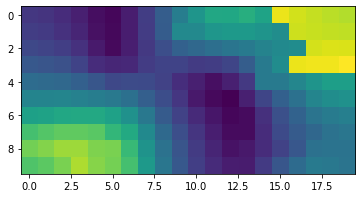


CURRENT VALUE FUNCTION


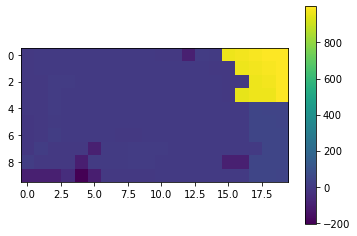



###############################    STEP  :  2    ##############################

CURRENT POLICY
↓↓↓↓↓↑←→↓←←→→↓↓→→→→↑
→→→→↓←→→↓↓↓→→→←←→→→↑
→→→→↓←←→↑←↓↓→↑↑←←→→↑
↓↓↓→↑←←←↑→↓↓↓↑↑→↑→→↑
→→↓↓↑←↑↑→→→→←↓↑↑↓↓↓↓
→→→←←←↑↓↓↓↓↓↑↓←→→↓↓↓
→→↑↑↑←→→→→→↓↓↑←→→↓↓↓
↑↑↑↑↑↓→→→→→→←←←→→↑←←
↑↓↑↑→→→→→→→↑↑↑←→↑↑↑↑
↑→↓←←↑→→→→↑↑←↑←←↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


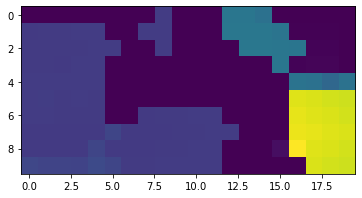


CURRENT VALUE FUNCTION


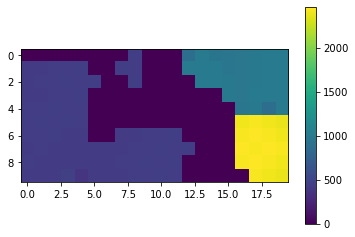



###############################    STEP  :  3    ##############################

CURRENT POLICY
→→→→↓←→→↓←→→→↓↓↓→→→↓
→→→→↓←→→↑→→→→→←←←→→↓
→→→→↑←↑↑↑←←→→↑↑↑←↓→↓
→→↓↑↑←←↑↑↑↓↓↑↑↑↓↓↓↓↓
→→↓↓↑←←↓↑↓↓↓←↑→→↓↓↓↓
→→↑←←←←→→→→↓↓↓→→→↓↓↓
↑↑↑↑↑↑→→→→→↓↓←→→→↓↓↓
↓↑↑↑↑↓→→→→→↑←←→→→↑←←
↓↓↓↓↓→→→→→↑↑↑←→↑↑↑↑↑
→→↓←←←↑↑↑↑↑↑↑←←↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


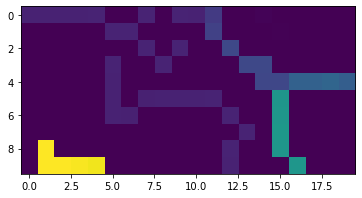


CURRENT VALUE FUNCTION


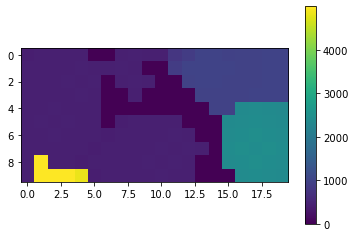



###############################    STEP  :  4    ##############################

CURRENT POLICY
→→→→↓←→→↓↓→→→↓↓→→→→↓
→→→→↓←→→→→→↓→→←←→↓→↓
→→→→↑←↑↑↑↑→→→↑↑↓↓↓←↓
→→↓↑↑←↑↑↑↑↑↑↑↑→↓↓↓↓↓
→→↓↓↑←←↑↑↑↓↓↑→→→↓↓↓↓
→→↑←←←←←↑→→↓↓→→→→↓↓↓
↓↑↑↑↑↑↑→→→→↓↓→→→→↓↓↓
↓↓↓↓↓↓→→→→→↑←→→→→↑←←
↓↓↓↓↓↓→→→→↑↑↑→↑↑↑↑↑↑
→→↓←←←←↑↑↑↑↑↑←→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


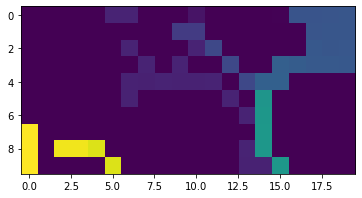


CURRENT VALUE FUNCTION


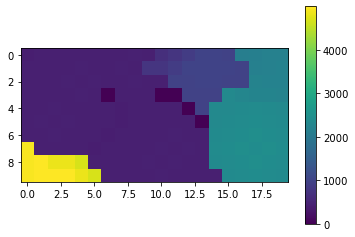



###############################    STEP  :  5    ##############################

CURRENT POLICY
→→→→↓→→→↓↓←↓→↓→→↓↓→↓
→→→→↓→→→→↓↓↓→→←↓↓↓→↓
→→→→↑→↑↑↑→→→→↑→↓←←←↓
→→↓↑↑→↑↑↑→↑↑↑→→↓↓↓↓↓
→→↓↓↑←↑↑↑↑↑↑→→→→↓↓↓↓
↓→↑←←←←↑↑↑→↓↓→→→→↓↓↓
↓←↓↓↓↓↑→↑→→↓↓→→→→↓↓↓
↓↓↓↓←↓←→→→→↑←→→→→↑←←
↓↓↓↓↓↓←→→→↑↑↑→↑↑↑↑↑↑
→→↓←←←←←↑↑↑↑↑→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


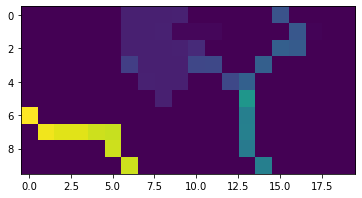


CURRENT VALUE FUNCTION


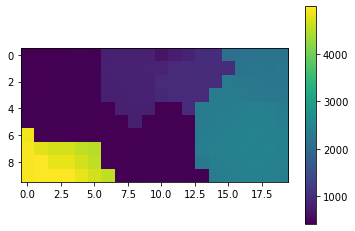



###############################    STEP  :  6    ##############################

CURRENT POLICY
→→→→↓→→→↓↓←←→→→↓↓↓←↓
→→→→↓→→→→↓↓↓→→→↓↓↓↓↓
→→→→↑→↑↑↑→→→→→→↓←←←←
→→↓↑↑→↑↑↑↑↑↑→→→↓↓↓↓↓
↓→↓↓↑→↑↑↑↑↑↑→→→→↓↓↓↓
↓↓↓↓↓↓↑↑↑↑←↓↓→→→→↓↓↓
↓←←↓↓←↓↑↑↑→↓↓→→→→↓↓↓
↓↓↓↓←↓↓←↑→→↑←→→→→↑←←
↓↓↓↓↓↓←←→→↑↑↑↓↑↑↑↑↑↑
→→↓←←←←←←↑↑↑→→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


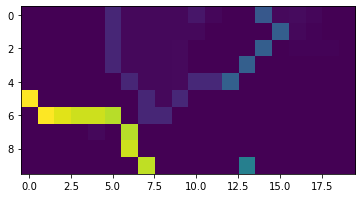


CURRENT VALUE FUNCTION


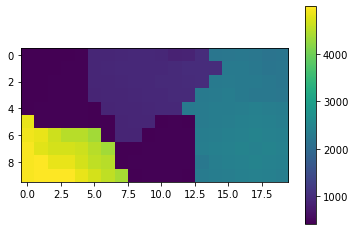



###############################    STEP  :  7    ##############################

CURRENT POLICY
→→→→↓→→→↓↓←←↓↓↓↓↓↓↓↓
→→→→↓→→→→↓↓↓→→→↓↓↓↓↓
↓↓↓→↑→↑↑→→→→→→→↓←←←←
↓→↓←↑→↑↑→↑↑→→→→↓↓↓↓↓
↓↓↓←↓↓↑↑→↑↑↑→→→→↓↓↓↓
↓↓↓←↓←←↑→↑←←↓→→→→↓↓↓
↓←←↓↓←↓↓→↑↑↓↓→→→→↓↓↓
↓↓↓↓←↓↓↓←↑→↑←→→→→↑←←
↓↓↓↓↓↓←←←→↑↑↓↓↑↑↑↑↑↑
→→↓←←←←↑←←↑→→→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


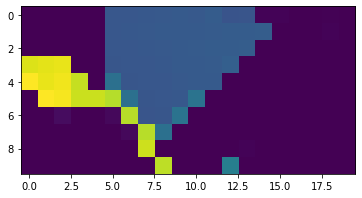


CURRENT VALUE FUNCTION


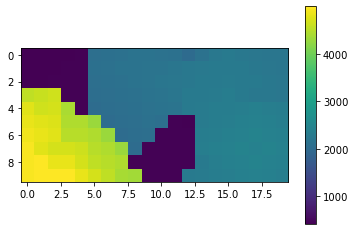



###############################    STEP  :  8    ##############################

CURRENT POLICY
→→→→↓→→→↓↓←←→↓↓↓↓↓↓↓
↓↓↓→↓→→→→↓↓↓→→→↓↓↓↓↓
↓←↓↓↑→↑→→→→→→→→↓←←←←
↓↓↓↓←↓↑→↑↑→→→→→↓↓↓↓↓
↓↓↓↓←↓↓→↑↑↑↑→→→→↓↓↓↓
↓↓↓←←←←↓↑↑←←←→→→→↓↓↓
↓←←↓↓←→↓↓↑↑↑↓→→→→↓↓↓
↓↓↓↓←↓↓↓↓←↑↑↓→→→→↑←←
↓↓↓↓↓↓←←←←↑→↓↓↑↑↑↑↑↑
→→↓←←←←↑↑←←→→→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


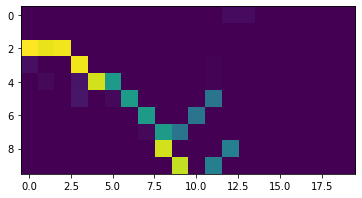


CURRENT VALUE FUNCTION


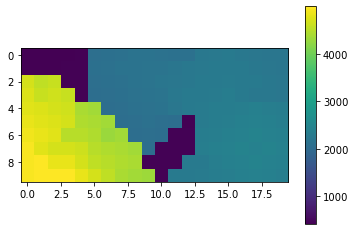



###############################    STEP  :  9    ##############################

CURRENT POLICY
↓↓↓→↓→→→↓↓←←→↓↓↓↓↓↓↓
↓↓↓↓↓→→→→↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓→→→→→→→→→→↓←←←←
↓↓↓↓↓↓↓↑↑→→→→→→↓↓↓↓↓
↓↓↓↓↓↓↓←↑↑↑↑→→→→↓↓↓↓
↓↓↓←←←←←↓↑←←↓→→→→↓↓↓
↓←←↑↑↑↑↓↓↓↑→↓→→→→↓↓↓
↓↓↓↓←↓↓↓↓↓←→↓→→→→↑←←
↓↓↓↓↓↓←←←←←→↓↓↑↑↑↑↑↑
→→↓←←←←↑↑↑←←→→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


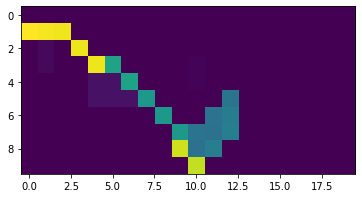


CURRENT VALUE FUNCTION


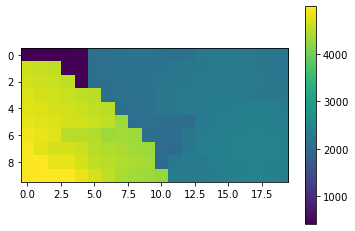



###############################    STEP  :  10    ##############################

CURRENT POLICY
↓↓↓↓↓←→→↓↓←←→↓↓↓↓↓↓↓
↓↓↓↓↓←→→→↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓←↓→→→→→→→→↓←←←←
↓↓↓↓↓↓↓↓→→→→→→→↓↓↓↓↓
↓↓↓↓↓↓↓↓←↑↑↑→→→→↓↓↓↓
↓↓↓←←←←←←↓←→↓→→→→↓↓↓
↓←←↑↑↑↑↑↓↓↓↓↓→→→→↓↓↓
↓↓↓↓←↓↓↓↓↓↓←↓→→→→↑←←
↓↓↓↓↓↓←←←←←←↓↓↑↑↑↑↑↑
→→↓←←←←↑↑↑↑←←→→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


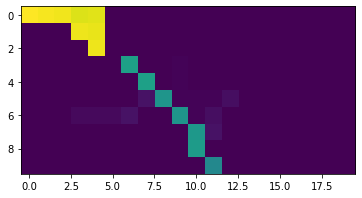


CURRENT VALUE FUNCTION


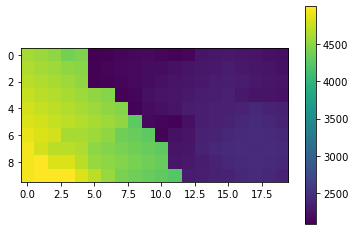



###############################    STEP  :  11    ##############################

CURRENT POLICY
↓↓↓↓↓←→→↓↓←←→↓↓↓↓↓↓↓
↓↓↓↓↓←↓→→↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓←↓↓→→→→→→→↓←←←←
↓↓↓↓↓↓↓↓↓→→→→→→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓←↓↓↓→→→↓↓↓↓
↓↓↓←←←←←←←↓↓↓←→→→↓↓↓
↓←←↑↑↑↑↑↑↓↓↓←←→→→↓↓↓
↓↓↓↓←↓↓↑↓↓↓↓←←→→→↑←←
↓↓↓↓↓↓←←←←←←←←↑↑↑↑↑↑
→→↓←←←←↑↑↑↑↑←←→↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


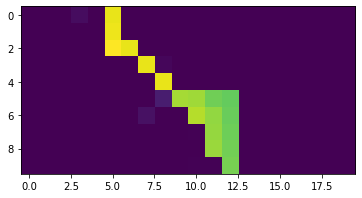


CURRENT VALUE FUNCTION


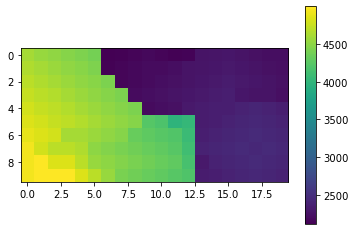



###############################    STEP  :  12    ##############################

CURRENT POLICY
↓↓↓↓↓←↓→↓↓←←→↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓→↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓←↓↓↓→→→→→→↓←←←←
↓↓↓↓↓↓↓↓↓↓→→→→→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓←↓↓→→→↓↓↓↓
↓↓↓←←←←←←←←↓↓←→→→↓↓↓
↓←←↑↑↑↑↑↑↑↓↓↓←→→→↓↓↓
↓↓↓↓←↓↓↑↑↓↓↓←←→→→↑←←
↓↓↓↓↓↓←←←←←←←←↑↑↑↑↑↑
→→↓←←←←↑↑↑↑↑↑←←↑↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


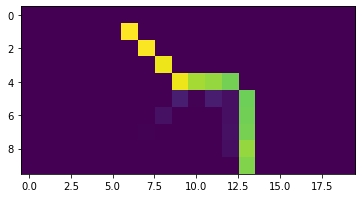


CURRENT VALUE FUNCTION


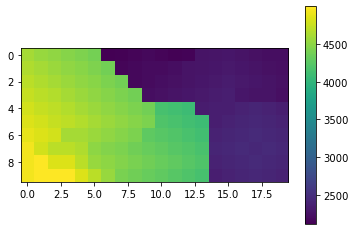



###############################    STEP  :  13    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓↓←←→↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓→→→→→↓←←←←
↓↓↓↓↓↓↓↓↓↓←→→→→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓→→→↓↓↓↓
↓↓↓←←←←←←←←←↓←→→→↓↓↓
↓←←↑↑↑↑↑↑↑↑↓↓←→→→↓↓↓
↓↓↓↓←↓↓↑↑↑↓↓←←→→→↑←←
↓↓↓↓↓↓←←←←←←←←↓↑↑↑↑↑
→→↓←←←←↑↑↑↑↑↑←←←↑↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


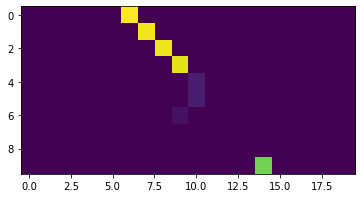


CURRENT VALUE FUNCTION


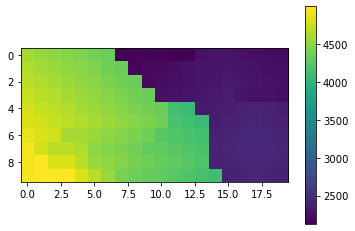



###############################    STEP  :  14    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←→↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓→→→↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓→→→→↓←←←←
↓↓↓↓↓↓↓↓↓↓←←→→→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓→→→↓↓↓↓
↓↓↓←←←←←←←←←←←→→→↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↓←→→→↓↓↓
↓↓↓↓←↓↓↑↑↑↑↓←←↓→→↑←←
↓↓↓↓↓↓←←←←←←←←↓↓↑↑↑↑
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


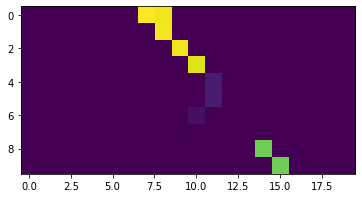


CURRENT VALUE FUNCTION


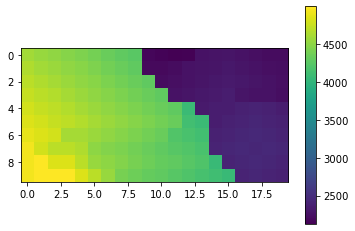



###############################    STEP  :  15    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓←→→→↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓→→→↓←←←←
↓↓↓↓↓↓↓↓↓↓←←←→→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓→→→↓↓↓↓
↓↓↓←←←←←←←←←←←→→→↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←↓→→↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←↓↓→↑←←
↓↓↓↓↓↓←←←←←←←←↓↓←↑↑↑
→→↓←←←←↑↑↑↑↑↑←←←←←↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


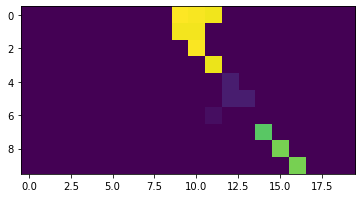


CURRENT VALUE FUNCTION


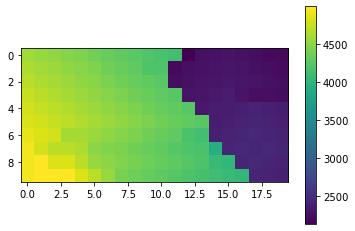



###############################    STEP  :  16    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←←↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓←→→↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓→→↓←←←←
↓↓↓↓↓↓↓↓↓↓←←←←→↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓→→→↓↓↓↓
↓↓↓←←←←←←←←←←←↓→→↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←↓↓→↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↑←←
↓↓↓↓↓↓←←←←←←←←↓↓←←↑↑
→→↓←←←←↑↑↑↑↑↑←←←←←←↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


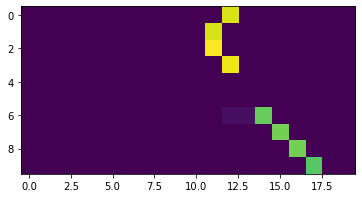


CURRENT VALUE FUNCTION


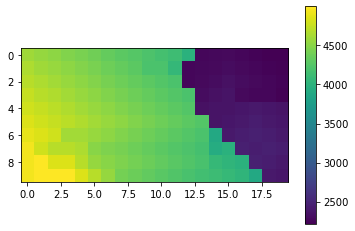



###############################    STEP  :  17    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←←←↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓←→↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓→↓←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓↑→→↓↓↓↓
↓↓↓←←←←←←←←←←←↓↓→↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←↑
→→↓←←←←↑↑↑↑↑↑←←←←↑←←


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


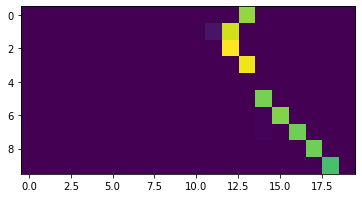


CURRENT VALUE FUNCTION


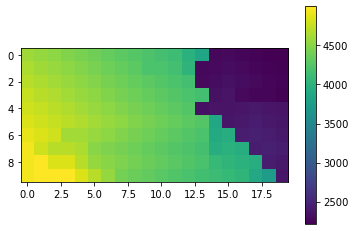



###############################    STEP  :  18    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓←↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓↓←←←↓
↓↓↓↓↓↓↓↓↓↓←←←←←↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↓↓↓↓↓↓
↓↓↓←←←←←←←←←←←→↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


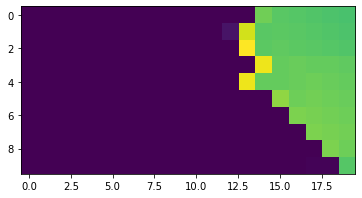


CURRENT VALUE FUNCTION


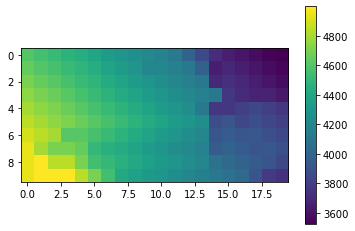



###############################    STEP  :  19    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓←↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↓↓↓↓↓
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↓↓↓↓↓↓
↓↓↓←←←←←←←←←←←→↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


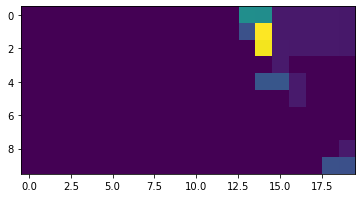


CURRENT VALUE FUNCTION


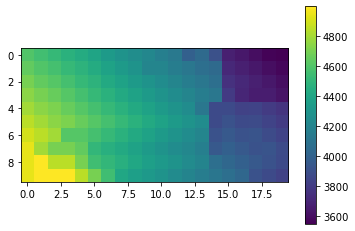



###############################    STEP  :  20    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↓↓↓↓↓↓
↓↓↓←←←←←←←←←←←→↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


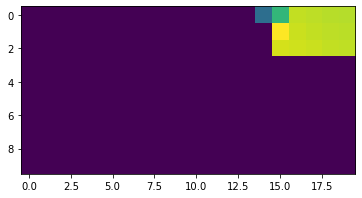


CURRENT VALUE FUNCTION


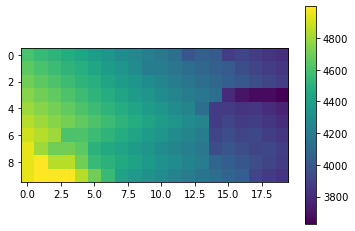



###############################    STEP  :  21    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓↓↓←↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←←↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↑↑↑↓↓↑
↓↓↓←←←←←←←←←←←→↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


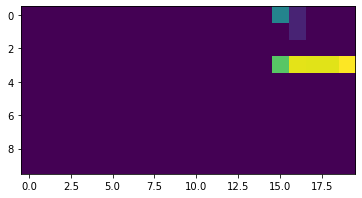


CURRENT VALUE FUNCTION


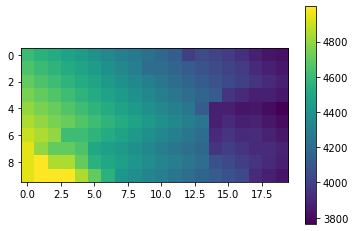



###############################    STEP  :  22    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓←↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←←←↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↑↑↑↓↓↑
↓↓↓←←←←←←←←←←←↑↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


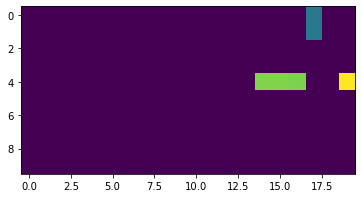


CURRENT VALUE FUNCTION


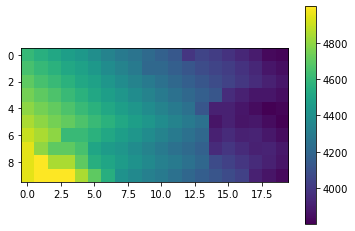



###############################    STEP  :  23    ##############################

CURRENT POLICY
↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←←←←
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↑↑↑↓↓↑
↓↓↓←←←←←←←←←←←↑↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑


DIFFERENCES WITH PREVIOUS VALUE FUNCTION


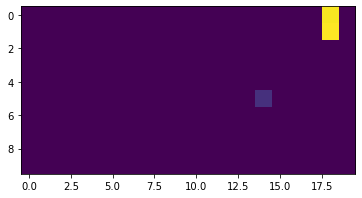


CURRENT VALUE FUNCTION


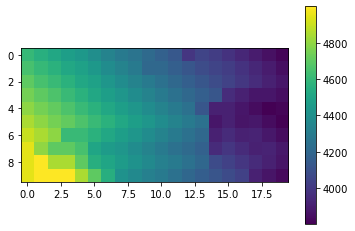



###############################    STEP  :  24    ##############################

----------> STABLE POLICY


In [22]:
policy_2, v_2 = policy_improvement(env, discount_factor = 0.99)

### Final results for Policy Iteration

Final policy

↓↓↓↓↓←↓↓↓←←←←↓↓↓↓↓↓↓
↓↓↓↓↓←↓↓↓↓↓↓↓↓←←←←←←
↓↓↓↓↓←↓↓↓↓↓↓↓↓↓←←←←←
↓↓↓↓↓↓↓↓↓↓←←←←←↑↑↑↑↑
↓↓↓↓↓↓↓↓↓↓↓↓↓↑↑↑↑↓↓↑
↓↓↓←←←←←←←←←←←↑↓↓↓↓↓
↓←←↑↑↑↑↑↑↑↑↑↑←→↓↓↓↓↓
↓↓↓↓←↓↓↑↑↑↑↑←←→↓↓↓←←
↓↓↓↓↓↓←←←←←←←←↓↓←←←←
→→↓←←←←↑↑↑↑↑↑←←←←↑↑↑

Final Value Function:


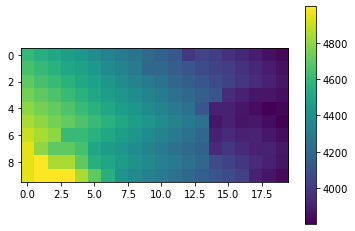

In [20]:
print("Final policy")
print("")
env.render_policy(np.reshape(np.argmax(policy_2, axis=1), env.shape))

print("Final Value Function:")
plt.imshow(v_2.reshape(env.shape))
plt.colorbar()

## Comments : 
- With a discount rate of 0.95, the policy is stable at the end... it's not the case with smaller discount rates (like 0.9 for example). 
- We need 16 steps to get the optimal policy and we therefore can say that the initial value function estimation (found with the random policy) wasn't the optimal one. 


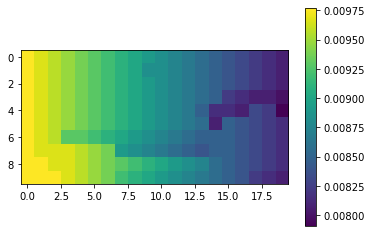

In [14]:
plt.imshow((v_2 - v_1).reshape(env.shape))
plt.colorbar()

- the value function given by Policy Iteration slightly differs from the one given by Value Iteration

In [15]:
np.reshape(np.argmax(policy_2, axis=1) - np.argmax(policy_1, axis=1), env.shape)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

#### - But policies are the same ! 